In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model


In [3]:

data_directory_path = 'content/women fashion/'
data_files_paths = os.listdir(data_directory_path)
data_files_paths

['anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg',
 'Anarkali suit with a modern twist.jpg',
 'Anarkali suit with fitted bodice with a high neckline.jpg',
 'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg',
 'anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg',
 'anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg',
 'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg',
 'beige top adorned with black dots and a green skirt.jpg',
 'black and white gingham checkered A-line dress with a flared skirt.jpg',
 'black double-breasted blazer with gold buttons, paired with a mid-length skirt.jpg',
 'black dress with lace detailing.jpg',
 'black dress with sparkling details.

In [4]:
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

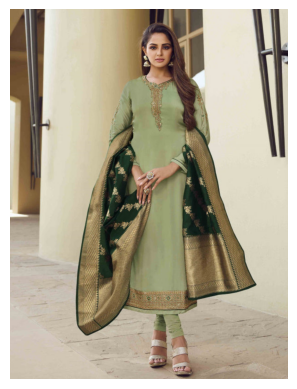

In [5]:
first_img_path = os.path.join(data_directory_path, data_files_paths[0])
display_image(first_img_path)

In [7]:
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_name in data_files_paths:
    full_img_path = os.path.join(data_directory_path, img_name)
    
    preprocessed_img = preprocess_image(full_img_path)
    features = extract_features(model, preprocessed_img)
    
    all_features.append(features)
    all_image_names.append(img_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 

In [ ]:
def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    data_directory_path = 'content/women fashion'  # your folder
    
    # Preprocess input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)
    
    # Compute cosine similarities
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    
    # Get top N indices (excluding the input image itself)
    input_image_name = os.path.basename(input_image_path)
    similar_indices = np.argsort(similarities)[::-1]  # descending order
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_name)]
    similar_indices = similar_indices[:top_n]

    # Display images
    plt.figure(figsize=(15, 10))
    
    # Input image
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')
    
    # Recommended images
    for i, idx in enumerate(similar_indices, start=1):
        image_path = os.path.join(data_directory_path, all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

In [ ]:
input_image_path = 'content/women fashion/dark, elegant, sleeveless dress that reaches down to about mid-calf.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, data_files_paths, model, top_n=4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


ValueError: 'content/women fashion/dark, elegant, sleeveless dress that reaches down to about mid-calf.jpg' is not in list

In [14]:
print(data_files_paths)

['anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg', 'Anarkali suit with a modern twist.jpg', 'Anarkali suit with fitted bodice with a high neckline.jpg', 'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg', 'anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg', 'anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg', 'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg', 'beige top adorned with black dots and a green skirt.jpg', 'black and white gingham checkered A-line dress with a flared skirt.jpg', 'black double-breasted blazer with gold buttons, paired with a mid-length skirt.jpg', 'black dress with lace detailing.jpg', 'black dress with sparkling details.jpg', 'blac